In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cosmic
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve
from cosmic.sample.sampler import independent

## Start playing with the metallicity, duration, and the models

In [3]:
final_kstar1 = [11, 12]
final_kstar2 = [10]

InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = InitialBinaryTable.sampler('independent', final_kstar1, final_kstar2, binfrac_model=0.5, primary_model='kroupa01', ecc_model='sana12', porb_model='sana12', qmin=-1, SF_start=13700.0, SF_duration=0.0, met=0.5, size=100)

print(InitialBinaries)

     kstar_1  kstar_2     mass_1    mass_2           porb       ecc  \
0        1.0      1.0   2.322691  2.310369  147644.020317  0.008985   
1        1.0      1.0   1.140366  0.783224       9.718680  0.496635   
2        1.0      1.0   1.782976  1.701072   11787.281846  0.329923   
3        1.0      1.0   1.997234  1.549822       5.564065  0.629110   
4        1.0      0.0   2.122529  0.564518    4578.958932  0.897940   
..       ...      ...        ...       ...            ...       ...   
97       1.0      1.0   3.193019  2.091424   96725.037043  0.011019   
98       1.0      0.0   0.928906  0.667619      62.810940  0.692335   
99       1.0      1.0   4.296046  2.785519       4.021690  0.161350   
100      1.0      0.0   0.901470  0.508845       1.856201  0.172696   
101      1.0      1.0  10.545483  4.911966     245.799263  0.006455   

     metallicity   tphysf    mass0_1   mass0_2  ...  tacc_1  tacc_2  epoch_1  \
0           0.03  13700.0   2.322691  2.310369  ...     0.0     0.0

In [4]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'dtp' : 13700.0}

bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

print(bcm.iloc[:10])

/Users/noahbungart/opt/anaconda3/lib/python3.8/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


     tphys  kstar_1   mass0_1    mass_1      lum_1     rad_1       teff_1  \
0      0.0      1.0  2.322691  2.322691  30.930687  1.920035  9867.620055   
0  13700.0     11.0  0.576031  0.576394   0.000004  0.013102  2252.356833   
1      0.0      1.0  1.140366  1.140366   1.393188  1.028696  6210.527252   
1  13700.0     11.0  0.514725  0.514725   0.000078  0.013999  4600.373994   
2      0.0      1.0  1.782976  1.782976  10.392392  1.661359  8076.379115   
2  13700.0     11.0  0.528655  0.540419   0.000006  0.013615  2499.848878   
3      0.0      1.0  1.997234  1.997234  16.721213  1.768539  8816.155088   
3  13700.0     11.0  0.836117  0.836117   0.000009  0.009898  3198.544804   
4      0.0      1.0  2.122529  2.122529  21.474287  1.827949  9231.393058   
4  13700.0     11.0  0.531827  0.531827   0.000004  0.013742  2247.466245   

    massc_1    radc_1        menv_1  ...          porb           sep  \
0  0.000000  0.000000  1.000000e-10  ...  1.476440e+05  19590.783081   
0  0.576

In [5]:
#print(bpp)
#print(bcm)
mass1 = bcm.mass_1
m1 = np.array(mass1)
mass2 = bcm.mass_2
m2 = np.array(mass2)

In [6]:
tphys = bcm.tphys
Tphys = np.array(tphys)

In [7]:
final_mass1 = [m1[i] for i in range(len(Tphys)) if Tphys[i] == 13700.0]
#print(final_mass1)
final_mass2 = [m2[i] for i in range(len(Tphys)) if Tphys[i] == 13700.0]
#print(final_mass2)
f_m1 = pd.DataFrame(final_mass1)
f_m2 = pd.DataFrame(final_mass2)

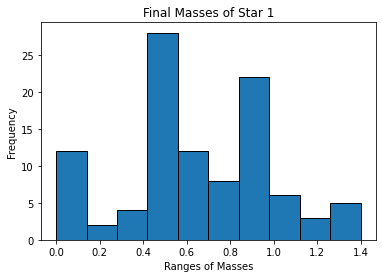

In [8]:
f_m1.plot(kind='hist', edgecolor='black', alpha=1, legend=None)
plt.title('Final Masses of Star 1')
plt.xlabel('Ranges of Masses')
plt.show()

Text(0.5, 0, 'Range of Masses')

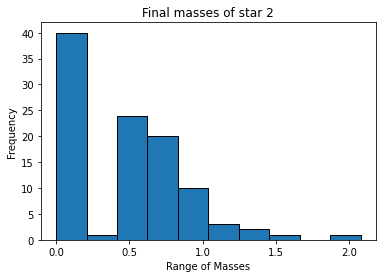

In [9]:
f_m2.plot(kind='hist', edgecolor='black', alpha=1, legend=None)
plt.title('Final masses of star 2')
plt.xlabel('Range of Masses')

In [26]:
#Getting rid of any binary systems with a period of infinity
fperiod = bcm.porb
fp = np.array(fperiod)
f_period = [fp[i] for i in range(len(Tphys)) if Tphys[i] == 13700.0]
f = [f_period[i] for i in range(len(f_period)) if f_period[i]!= np.Inf]
#f0 = [f[i] for i in range(len(f)) if f[i] != 0.0]
#f_0 = [f0[i] for i in range(len(f0)) if f0[i] <= 1.0]
fp1 = pd.DataFrame(f)
#print(fp1)

Text(0.5, 0, 'Periods')

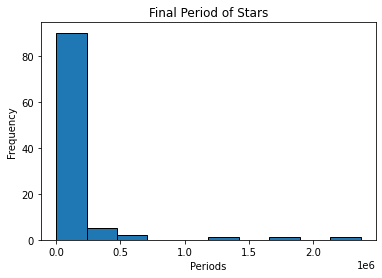

In [27]:
fp1.plot(kind='hist', edgecolor='black', legend=None)
plt.title('Final Period of Stars')
plt.xlabel('Periods')